In [1]:
import pandas as pd 
import numpy as np 

from nba_api.stats.static import players 
import time
from nba_api.stats.endpoints import leaguestandingsv3, leaguedashteamstats
from nba_api.stats.library.parameters import SeasonTypeAllStar, MeasureTypeBase

In [2]:
cols = [
    #  'LeagueID',
    #  'SeasonID',
    #  'TeamID', 
    'Season',
    'TeamCity',
    'TeamName',
    #  'TeamSlug',
    'Conference',
    #  'ConferenceRecord',
    #  'PlayoffRank',
    #  'ClinchIndicator',
    'Division',
    #  'DivisionRecord',
    #  'DivisionRank',
    #  'WINS',
    #  'LOSSES',
    #  'WinPCT',
    #  'LeagueRank',
    #  'Record',
    #  'HOME',
    #  'ROAD',
    'L10',
    'Last10Home',
    'Last10Road',
    #  'OT',
    #  'ThreePTSOrLess',
    #  'TenPTSOrMore',
    # 'LongHomeStreak',
    # 'LongRoadStreak',
    # 'LongWinStreak',
    # 'LongLossStreak',
    #  'CurrentHomeStreak',
    #  'CurrentRoadStreak',
    #  'CurrentStreak',
    #  'ConferenceGamesBack',
    #  'DivisionGamesBack',
    #  'ClinchedConferenceTitle',
    #  'ClinchedDivisionTitle',
    #  'ClinchedPlayoffBirth',
    #  'ClinchedPlayIn',
    #  'EliminatedConference',
    #  'EliminatedDivision',
    # 'AheadAtHalf',
    # 'BehindAtHalf',
    # 'TiedAtHalf',
    # 'AheadAtThird',
    # 'BehindAtThird',
    # 'TiedAtThird',
    # 'Score100PTS',
    # 'OppScore100PTS',
    # 'OppOver500',
    # 'LeadInFGPCT',
    # 'LeadInReb',
    # 'FewerTurnovers',
    # 'PointsPG',
    # 'OppPointsPG',
    # 'DiffPointsPG',
    #  'vsEast',
    #  'vsAtlantic',
    #  'vsCentral',
    #  'vsSoutheast',
    #  'vsWest',
    #  'vsNorthwest',
    #  'vsPacific',
    #  'vsSouthwest',
    #  'Jan',
    #  'Feb',
    #  'Mar',
    #  'Apr',
    #  'Oct',
    #  'Nov',
    #  'Dec',
    # 'Score_80_Plus',
    # 'Opp_Score_80_Plus',
    # 'Score_Below_80',
    # 'Opp_Score_Below_80',
    # 'TotalPoints',
    # 'OppTotalPoints',
    # 'DiffTotalPoints',
    #  'LeagueGamesBack',
    #  'PlayoffSeeding',
    #  'ClinchedPostSeason',
    #  'NEUTRAL',
    #  'TEAM_ID',
    #  'TEAM_NAME',
    #  'GP',
    #  'W',
    #  'L',
    #  'W_PCT',
    # 'MIN',
    # 'E_OFF_RATING',
    'OFF_RATING',
    # 'E_DEF_RATING',
    'DEF_RATING',
    # 'E_NET_RATING',
    # 'NET_RATING',
    'AST_PCT',
    'AST_TO',
    'AST_RATIO',
    'OREB_PCT',
    'DREB_PCT',
    'REB_PCT',
    'TM_TOV_PCT',
    'EFG_PCT',
    'TS_PCT',
    # 'E_PACE',
    'PACE',
    'PACE_PER40',
    'POSS',
    'PIE',
    #  'GP_RANK',
    #  'W_RANK',
    #  'L_RANK',
    #  'W_PCT_RANK',
    #  'MIN_RANK',
    'OFF_RATING_RANK',
    'DEF_RATING_RANK',
    # 'NET_RATING_RANK',
    'AST_PCT_RANK',
    'AST_TO_RANK',
    'AST_RATIO_RANK',
    'OREB_PCT_RANK',
    'DREB_PCT_RANK',
    'REB_PCT_RANK',
    'TM_TOV_PCT_RANK',
    'EFG_PCT_RANK',
    'TS_PCT_RANK',
    'PACE_RANK',
    # 'PIE_RANK',
    #  'BENCH_TEAM_NAME',
    #  'BENCH_GP',
    #  'BENCH_W',
    #  'BENCH_L',
    #  'BENCH_W_PCT',
    'BENCH_MIN',
    'BENCH_FGM',
    'BENCH_FGA',
    'BENCH_FG_PCT',
    'BENCH_FG3M',
    'BENCH_FG3A',
    'BENCH_FG3_PCT',
    'BENCH_FTM',
    'BENCH_FTA',
    'BENCH_FT_PCT',
    'BENCH_OREB',
    'BENCH_DREB',
    'BENCH_REB',
    'BENCH_AST',
    'BENCH_TOV',
    'BENCH_STL',
    'BENCH_BLK',
    'BENCH_BLKA',
    'BENCH_PF',
    'BENCH_PFD',
    'BENCH_PTS',
    'BENCH_PLUS_MINUS',
    #  'BENCH_GP_RANK',
    #  'BENCH_W_RANK',
    #  'BENCH_L_RANK',
    #  'BENCH_W_PCT_RANK',
    # 'BENCH_MIN_RANK',
    # 'BENCH_FGM_RANK',
    # 'BENCH_FGA_RANK',
    # 'BENCH_FG_PCT_RANK',
    'BENCH_FG3M_RANK',
    'BENCH_FG3A_RANK',
    'BENCH_FG3_PCT_RANK',
    # 'BENCH_FTM_RANK',
    # 'BENCH_FTA_RANK',
    # 'BENCH_FT_PCT_RANK',
    # 'BENCH_OREB_RANK',
    # 'BENCH_DREB_RANK',
    # 'BENCH_REB_RANK',
    # 'BENCH_AST_RANK',
    'BENCH_TOV_RANK',
    # 'BENCH_STL_RANK',
    # 'BENCH_BLK_RANK',
    # 'BENCH_BLKA_RANK',
    # 'BENCH_PF_RANK',
    'BENCH_PFD_RANK',
    'BENCH_PTS_RANK',
    'BENCH_PLUS_MINUS_RANK',
    "PO_WINS",
    "target",
    # 'BASE_TEAM_NAME',
    # 'BASE_GP',
    # 'BASE_W',
    # 'BASE_L',
    # 'BASE_W_PCT',
    # 'BASE_MIN',
    'BASE_FGM',
    'BASE_FGA',
    'BASE_FG_PCT',
    'BASE_FG3M',
    'BASE_FG3A',
    'BASE_FG3_PCT',
    'BASE_FTM',
    'BASE_FTA',
    'BASE_FT_PCT',
    'BASE_OREB',
    'BASE_DREB',
    'BASE_REB',
    'BASE_AST',
    'BASE_TOV',
    'BASE_STL',
    'BASE_BLK',
    'BASE_BLKA',
    'BASE_PF',
    'BASE_PFD',
    'BASE_PTS',
    'BASE_PLUS_MINUS',
    # 'BASE_GP_RANK',
    # 'BASE_W_RANK',
    # 'BASE_L_RANK',
    # 'BASE_W_PCT_RANK',
    # 'BASE_MIN_RANK',
    'BASE_FGM_RANK',
    'BASE_FGA_RANK',
    'BASE_FG_PCT_RANK',
    'BASE_FG3M_RANK',
    'BASE_FG3A_RANK',
    'BASE_FG3_PCT_RANK',
    'BASE_FTM_RANK',
    'BASE_FTA_RANK',
    'BASE_FT_PCT_RANK',
    'BASE_OREB_RANK',
    'BASE_DREB_RANK',
    'BASE_REB_RANK',
    'BASE_AST_RANK',
    'BASE_TOV_RANK',
    'BASE_STL_RANK',
    'BASE_BLK_RANK',
    'BASE_BLKA_RANK',
    'BASE_PF_RANK',
    'BASE_PFD_RANK',
    'BASE_PTS_RANK',
    'BASE_PLUS_MINUS_RANK'
]
len(cols)

108

In [3]:
full_df = pd.read_csv("../input/df_all.csv")

In [4]:
def create_tier_label(row):
    # プレイオフ不出場の場合
    wins = row['PO_WINS']   
    if pd.isna(wins) or wins == 0:
        return 0  # Tier 0: プレイオフ不出場 (No Playoffs)
    
    if wins == 16:
        return 2  # Tier 2: 優勝 (Champion)
    elif wins >= 12:
        return 2  # Tier 2: NBA Final敗退 (Runner-up) 
    elif wins >= 8:
        return 2  # Tier 2: Conf. Final敗退 (Best 4)
    elif wins >= 4:
        return 2  # Tier 2: Conf. Semifinals敗退 (Best 8)
    else:
        return 1  # Tier 1: 1st Round敗退 (Best 16)

# ラベルの適用
full_df['target'] = full_df.apply(create_tier_label, axis=1)
full_df['target'].value_counts().sort_index()
# ラベルの適用
full_df['target'] = full_df.apply(create_tier_label, axis=1)
full_df['target'].value_counts().sort_index()

target
0    234
1     96
2    120
Name: count, dtype: int64

In [5]:
import lightgbm as lgb 
from sklearn.model_selection import train_test_split 
import warnings 
warnings.filterwarnings("ignore")

df = full_df[cols].sort_values(by=["PO_WINS"], ascending = False) 

feature_cols = [col for col in cols if col not in ["TeamCity","TeamName","Season", "ConferenceRecord", "PO_WINS", "target"]] 
target_col = "target" 

X = df[feature_cols]
y = df[target_col]   

# categorical features
cat_cols = ['Conference', 'Division']
for c in cat_cols:
    if c in X.columns:
        X[c] = X[c].astype('category') 
X = X.select_dtypes(include=['number', 'category']) 

# test_split
# random_state = 42 
random_state = np.random.randint(0, 10000) 
print(f"Random State: {random_state}") 

train_conditions = (df['Season'] < '2023-24') & (df['Season'] >= '2014-15')
test_conditions = (df['Season'] >= '2023-24') 

X_train = X[train_conditions]
y_train = y[train_conditions]
X_test = X[test_conditions]
y_test = y[test_conditions]
train_data = lgb.Dataset(X_train, label=y_train) 
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data) 

params = {
    'objective': 'multiclass',        # 多クラス分類 
    'num_class': 3,                  # クラス数
    'metric': ['multi_logloss', 'multi_error'],              # 評価指標（多クラスの対数損失）
    'boosting_type': 'gbdt',
    'num_leaves': 31,             # 木の複雑さ 
    'max_depth': 10, 
    'learning_rate': 0.05,        # 学習率
    'feature_fraction': 0.9,      # 特徴量のランダム選択率
    'bagging_fraction': 0.8,      # データのランダム選択率
    'bagging_freq': 5,
    'verbose': -1,
    'seed': 42
} 


Random State: 4589


In [6]:
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, valid_data],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(50)
    ]
)

Training until validation scores don't improve for 100 rounds
[50]	training's multi_logloss: 0.285041	training's multi_error: 0.0666667	valid_1's multi_logloss: 0.600127	valid_1's multi_error: 0.216667
[100]	training's multi_logloss: 0.101396	training's multi_error: 0	valid_1's multi_logloss: 0.662494	valid_1's multi_error: 0.25
Early stopping, best iteration is:
[37]	training's multi_logloss: 0.372297	training's multi_error: 0.108333	valid_1's multi_logloss: 0.579044	valid_1's multi_error: 0.216667


In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = np.argmax(y_pred_prob, axis=1) 

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7833333333333333


In [8]:
# --- 7. 予測結果の確認（実際にどのチームを優勝と予測したか） ---
# テストデータの元の情報を結合して確認
results = X_test.copy()
results['Actual_Class'] = y_test
results['Predicted_class'] = y_pred

results = results.join(df[['TeamName', 'Season']], how='left')
results[['Season', 'TeamName', 'Actual_Class',"Predicted_class"]].sort_values(by='Actual_Class', ascending=False).head(20)

,Season,TeamName,Actual_Class,Predicted_class
391,2023-24,Celtics,2,2
393,2023-24,Knicks,2,2
421,2024-25,Thunder,2,2
420,2024-25,Cavaliers,2,2
396,2023-24,Cavaliers,2,1
433,2024-25,Warriors,2,0
390,2023-24,Thunder,2,2
426,2024-25,Nuggets,2,2
422,2024-25,Celtics,2,2
392,2023-24,Nuggets,2,2


In [9]:
results["Actual_Class"].value_counts()

Actual_Class
0    32
2    16
1    12
Name: count, dtype: int64

In [10]:
a = results[['Season', 'TeamName', 'Actual_Class',"Predicted_class"]] 
wa = a[a['Actual_Class'] != a['Predicted_class']]  
wa["Actual_Class"].value_counts()   

Actual_Class
1    6
2    4
0    3
Name: count, dtype: int64

In [11]:
wa

,Season,TeamName,Actual_Class,Predicted_class
427,2024-25,Pacers,2,1
399,2023-24,Mavericks,2,1
433,2024-25,Warriors,2,0
396,2023-24,Cavaliers,2,1
423,2024-25,Rockets,1,2
429,2024-25,Clippers,1,2
397,2023-24,Clippers,1,2
395,2023-24,Bucks,1,2
432,2024-25,Magic,1,0
405,2023-24,Heat,1,0


In [12]:
y_pred_prob_all = model.predict(X, num_iteration=model.best_iteration)
rall = full_df.copy()
rall["Actual_Class"] = y
rall["Predicted_Prob"] = np.max(y_pred_prob_all, axis=1)
rall["Prediction"] = np.argmax(y_pred_prob_all, axis=1)
rall[['Season', 'TeamName', 'Actual_Class',"Prediction", 'Predicted_Prob', "WINS", "LOSSES"]].sort_values(by='Prediction', ascending=False).head(20)

,Season,TeamName,Actual_Class,Prediction,Predicted_Prob,WINS,LOSSES
0,2009-10,Cavaliers,2,2,0.803384,61,21
96,2012-13,Nets,1,2,0.713324,49,33
101,2012-13,Warriors,2,2,0.824861,47,35
102,2012-13,Lakers,0,2,0.622941,45,37
103,2012-13,Celtics,1,2,0.744647,41,40
104,2012-13,Rockets,1,2,0.771087,45,37
105,2012-13,Bucks,0,2,0.413453,38,44
108,2012-13,Mavericks,0,2,0.822297,41,41
109,2012-13,Raptors,0,2,0.778708,34,48
110,2012-13,Trail Blazers,0,2,0.849230,33,49


In [13]:
import plotly.express as px

# --- 1. 重要度の抽出とデータフレーム化 ---
# gain: その特徴量が予測精度をどれだけ向上させたか（本質的な貢献度）
importance = model.feature_importance(importance_type='gain')
feature_names = model.feature_name()

df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# 上位20個を抽出してソート
df_importance = df_importance.sort_values(by='Importance', ascending=False).head(20)

# --- 2. Plotlyで描画 ---
fig = px.bar(
    df_importance,
    x='Importance',
    y='Feature',
    orientation='h',  # 横棒グラフ
    title='<b>NBA優勝への寄与度 </b>',
    labels={'Importance': '重要度 (Gain)', 'Feature': '指標 (スタッツ)'},
    color='Importance', # 重要度に応じて色を変える
    color_continuous_scale='Viridis', # グラデーションカラー (Viridisは見やすくて論文向き)
    text_auto='.2f' # 値を小数点2桁まで表示
)

# --- 3. レイアウトの調整 ---
fig.update_layout(
    yaxis=dict(autorange="reversed"), # 重要度が高いものを一番上に表示
    xaxis_title="モデルへの貢献度 (Gain)",
    yaxis_title="指標名",
    height=700, # グラフの高さ
    template="plotly_white", # 背景を白にしてすっきりさせる
    font=dict(family="Arial", size=12)
)

# ツールチップ（マウスオーバー時）の表示設定
fig.update_traces(
    textposition='outside', # 数値を棒の外側に表示
    hovertemplate='<b>%{y}</b><br>貢献度: %{x:.2f}<extra></extra>'
)

fig.show()

Computing SHAP values...


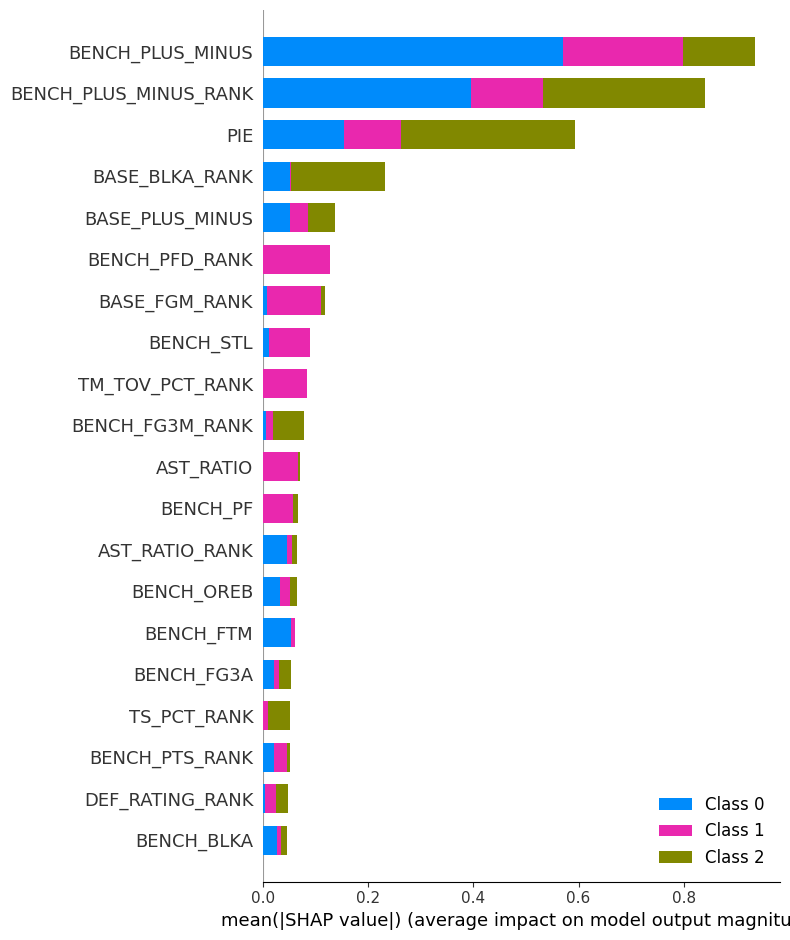

In [14]:
# SHAP解析とPlotly可視化
import shap

print("Computing SHAP values...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)   
shap.summary_plot(shap_values, X, plot_type="bar")    